In [28]:
import bempp.api
from bempp.api.assembly.blocked_operator import BlockedOperator
import numpy as np
from numpy.linalg import slogdet
import matplotlib.pyplot as plt

bempp.api.enable_console_logging()
bempp.api.show_available_platforms_and_devices()
bempp.api.set_default_device(0, 0)

bempp:HOST:INFO: Default device: pthread-Intel(R) Xeon(R) W-2155 CPU @ 3.30GHz. Device Type: cpu. Native vector width: 16 (single) / 8 (double).


0: Portable Computing Language
    0: pthread-Intel(R) Xeon(R) W-2155 CPU @ 3.30GHz


Setting the size of the element of the mesh and the center of the two spheres. The radius of the sphere is 1 and the length of the cube is 1 by default.

In [22]:
h = 0.1   # size of the mesh (element)
center1 = (2, 0, 0) # center of one sphere
center2 = (-2, 0, 0) # center of the other sphere

sphere1 = bempp.api.shapes.sphere(h=h, origin=center1) # construct the spheres
sphere2 = bempp.api.shapes.sphere(h=h, origin=center2)

cube1 = bempp.api.shapes.cube(h=h, origin=center1)
cube2 = bempp.api.shapes.cube(h=h, origin=center2)

bempp:HOST:INFO: Created grid with id 1aa9b993-9801-4e60-a547-d898fe7add79. Elements: 3214. Edges: 4821. Vertices: 1609
bempp:HOST:INFO: Created grid with id 6adb3296-1a3e-48f1-a917-c8523a9d1fc3. Elements: 3212. Edges: 4818. Vertices: 1608
bempp:HOST:INFO: Created grid with id 8f06c5f1-e318-45d9-bb86-945e06e0d357. Elements: 1476. Edges: 2214. Vertices: 740
bempp:HOST:INFO: Created grid with id 04142010-a399-42aa-b074-7f437884a184. Elements: 1478. Edges: 2217. Vertices: 741


Construct RWG and SNC in difference spaces.

In [23]:
rwg1 = bempp.api.function_space(sphere1, "RWG", 0)
rwg2 = bempp.api.function_space(sphere2, "RWG", 0)

snc1 = bempp.api.function_space(sphere1, "SNC", 0)
snc2 = bempp.api.function_space(sphere2, "SNC", 0)

We are defining an exponentially adapted trapezoid rule and choose the quadrature points accordingly.

In [36]:
N = 10
lbound = .05
ubound = 4

# We use an exponentially adapted trapezoid rule.
quad_points = np.linspace(np.exp(-ubound), np.exp(-lbound), N)
results = np.empty(N, dtype='float64')

for index, point in enumerate(quad_points):
    
    wavenumber = -1j * np.log(point)

    op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
    op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
    op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
    op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

    mat11 = op11.weak_form().A
    mat22 = op22.weak_form().A
    
    mat = np.real(blocked_op.weak_form().A)
    mat2 = 
    combined = np.linalg.inv(mat2).dot(mat)
    sign, logdet = slogdet(combined)
    results[index] = logdet
    print(f"Log Determinant: {index}: {logdet}")
    

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [8]:
%matplotlib inline
from matplotlib.pyplot import figure

The left plot shows the relative log determinant with increasing imaginary wavenumber. The right plot uses a scale appropriate for the trapezoid quadrature rule.

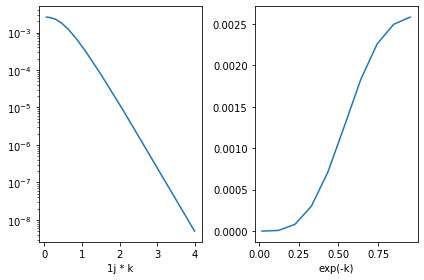

In [17]:
%matplotlib inline
from matplotlib.pyplot import figure

fig = figure()
ax1 = fig.add_subplot(121)
ax1.set_xlabel('1j * k')
ax2 = fig.add_subplot(122)
ax2.set_xlabel('exp(-k)')
ax1.semilogy(-np.log(quad_points), -results)
ax2.plot(quad_points, -results)
fig.tight_layout()

In [18]:
casimir_energy = np.trapz(-results / quad_points, quad_points) / (2 * np.pi)
print(f"The normalized Casimir Energy is: {casimir_energy}")

The normalized Casimir Energy is: 0.00025636676197413484
